In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
pd.set_option('display.max_columns', None)
%matplotlib inline
from IPython.display import display, HTML

import sys, os, importlib
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import miptlabs as ml
importlib.reload(ml)

importlib.reload(log)
log.basicConfig(level=log.INFO, format='LOG %(message)s', stream=sys.stdout)

sp.Basic.__str__=lambda expr, **settings:ml.PQStrPrinter(settings).doprint(expr)

sp.__version__

'1.1.2.dev'

In [3]:
data = pd.read_csv('2.2.csv')
display(data)

,lambda,neon,drum,Yellow 22,Green 23,Pink 8,lambda.1,mercury,drum.1,hydrogen,drum.2,iodium,drum.3
0,6717,3,2530,2176.0,1916.0,2416.0,690.7,k1,2586.0,Violet 2,424.0,1.0,2314.0
1,6507,7,2454,2176.0,1916.0,2416.0,623.4,k2,2350.0,Violet 1,832.0,6.0,2212.0
2,6402,8,2416,2176.0,1916.0,2416.0,579.1,1,2146.0,Blue,1480.0,NaN,NaN
3,6217,13,2342,2176.0,1916.0,2414.0,577.0,2,2134.0,Green 2,1868.0,NaN,NaN
4,6143,15,2310,2176.0,1916.0,2416.0,546.1,3,1954.0,Green 1,1942.0,NaN,NaN
5,6096,16,2292,2176.0,1916.0,2416.0,491.6,4,1532.0,Red 2,2316.0,NaN,NaN
6,6074,17,2280,NaN,NaN,NaN,435.8,5,868.0,Red 1,2472.0,NaN,NaN
7,6030,18,2252,NaN,NaN,NaN,404.7,6,314.0,NaN,NaN,NaN,NaN
8,5976,19,2240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5945,20,2224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Погрешность измерения длины одинакова: по 5 мм с каждой стороны
dist_sigma = np.sqrt(2)*0.5*u.mm
coord_sigma = 1*u.mm

df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df1['no'] = ml.get_column(data, 'neon', lambda row: row['neon'])
df1['lambda'] = ml.get_column(data, 'lambda', lambda row: ml.PQ(row['lambda']/10*u.nanometer, is_const=True))
df1['ticks'] = ml.get_column(data, 'drum', lambda row: ml.PQ(row['drum'], sigma=2))
df2['no'] = ml.get_column(data, 'mercury', lambda row: row['mercury'])
df2['lambda'] = ml.get_column(data, 'lambda.1', lambda row: ml.PQ(row['lambda.1']*u.nanometer, is_const=True))
df2['ticks'] = ml.get_column(data, 'drum.1', lambda row: ml.PQ(row['drum.1'], sigma=2))
df3['no'] = ml.get_column(data, 'hydrogen', lambda row: row['hydrogen'])
df3['ticks'] = ml.get_column(data, 'drum.2', lambda row: ml.PQ(row['drum.2'], sigma=2))
df4['no'] = ml.get_column(data, 'iodium', lambda row: row['iodium'])
df4['ticks'] = ml.get_column(data, 'drum.3', lambda row: ml.PQ(row['drum.3'], sigma=2))

display(df1)
display(df2)
display(df3)
display(df4)

with open('lol.html', 'w+') as f:
    f.write(df1.to_html())
    f.write(df2.to_html())
    f.write(df3.to_html())
   # f.write(df4.to_html())

,no,lambda,ticks
0,3,671.700000 nn,2530.0±2.0 (0.079%)
1,7,650.700000 nn,2454.0±2.0 (0.081%)
2,8,640.200000 nn,2416.0±2.0 (0.083%)
3,13,621.700000 nn,2342.0±2.0 (0.085%)
4,15,614.300000 nn,2310.0±2.0 (0.087%)
5,16,609.600000 nn,2292.0±2.0 (0.087%)
6,17,607.400000 nn,2280.0±2.0 (0.088%)
7,18,603.000000 nn,2252.0±2.0 (0.089%)
8,19,597.600000 nn,2240.0±2.0 (0.089%)
9,20,594.500000 nn,2224.0±2.0 (0.090%)


,no,lambda,ticks
0,k1,690.700000 nn,2586.0±2.0 (0.077%)
1,k2,623.400000 nn,2350.0±2.0 (0.085%)
2,1,579.100000 nn,2146.0±2.0 (0.093%)
3,2,577.000000 nn,2134.0±2.0 (0.094%)
4,3,546.100000 nn,1954.0±2.0 (0.10%)
5,4,491.600000 nn,1532.0±2.0 (0.13%)
6,5,435.800000 nn,868.0±2.0 (0.23%)
7,6,404.700000 nn,314.0±2.0 (0.64%)


,no,ticks
0,Violet 2,424.0±2.0 (0.47%)
1,Violet 1,832.0±2.0 (0.24%)
2,Blue,1480.0±2.0 (0.14%)
3,Green 2,1868.0±2.0 (0.11%)
4,Green 1,1942.0±2.0 (0.10%)
5,Red 2,2316.0±2.0 (0.086%)
6,Red 1,2472.0±2.0 (0.081%)


,no,ticks
0,1.0,2314.0±2.0 (0.086%)
1,6.0,2212.0±2.0 (0.090%)


/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<class 'float'>
0    410.88±0.22  (0.055%)
1    433.78±0.22  (0.052%)
2      487.2±0.3  (0.069%)
3      535.0±0.5  (0.097%)
4      544.6±0.5  (0.095%)
5       616.0±0.9  (0.14%)
6       658.2±1.1  (0.17%)
Name: lambda, dtype: object
0    615.6±0.9  (0.14%)
1    593.4±0.9  (0.15%)
Name: lambda, dtype: object


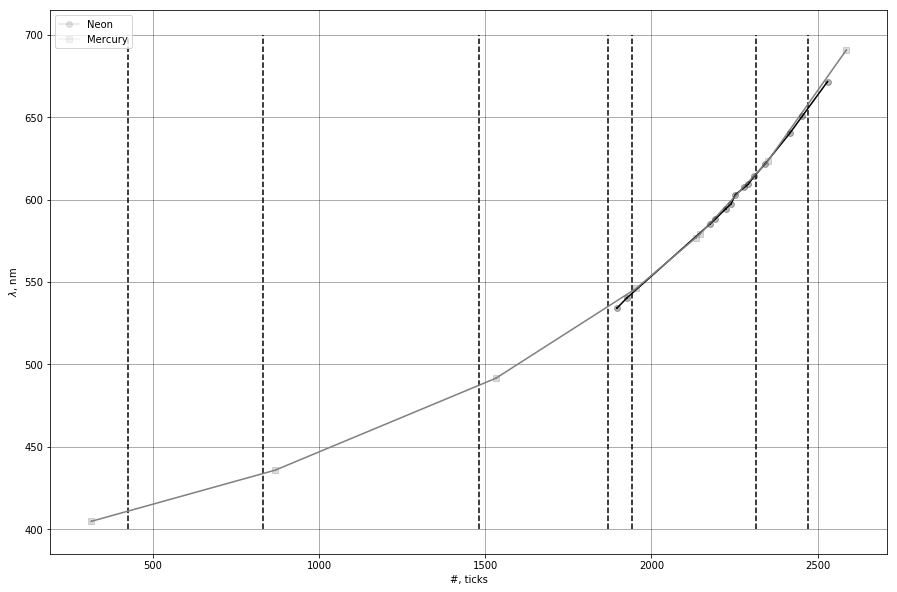

[658.2±1.1  (0.17%),
 487.2±0.3  (0.069%),
 433.78±0.22  (0.052%),
 410.88±0.22  (0.055%)]

In [21]:
plt.figure(figsize=(15, 10))
ml.plt_pq(df1['ticks'], df1['lambda'], label='Neon', marker='o', color='black')
ml.plt_pq(df2['ticks'], df2['lambda'], label='Mercury', marker='s', color='gray')
for l in df3['ticks']:
    plt.vlines(l.val, 400, 700, color='black',  linestyles='dashed')
    
from scipy.interpolate import interp1d
f = interp1d(ml.pqarray(df2['ticks']).val_float, ml.pqarray(df2['lambda']).val_float)
#ml.plt_pq(df2['drum'], f(ml.pqarray(df2['drum']).val_float), label='Spline')
print(type(float(df3['ticks'][0].val)))
df3['lambda'] = pd.Series([ml.PQ(f(float(tick.val)), 
                                 sigma=(f(float(tick.val)+float(tick.sigma))-
                                          f(float(tick.val)-float(tick.sigma))))
                           for tick in df3['ticks']])
print(df3['lambda'])

df4['lambda'] = pd.Series([ml.PQ(f(float(tick.val)), 
                                 sigma=(f(float(tick.val)+float(tick.sigma))-
                                          f(float(tick.val)-float(tick.sigma))))
                           for tick in df4['ticks']])
print(df4['lambda'])

hydrogen_lambda_needed = [df3['lambda'][6], df3['lambda'][2], df3['lambda'][1], df3['lambda'][0]]
plt.xlabel('#, ticks')
plt.ylabel('$\lambda$, nm')
plt.legend(loc='upper left')
plt.show()

display(hydrogen_lambda_needed)

In [7]:
# Постоянная Ридберга
n=2
R = np.zeros(4)
sigma = np.zeros(4)
for m in range(3,7):
    R[m-3] = 1.0 * 1/(1/n**2 - 1/m**2)/(hydrogen_spectre[m-3]*(10**(-10)))
    sigma[m-3] = 1.0 * 1/(1/n**2 - 1/m**2)/((hydrogen_spectre[m-3]*10**(-10))**2)*(35*10**(-10))
    print(R[m-3])
    print(sigma[m-3])
    print()
Rs = [ml.PQ(r*u.m**(-1), sigma=s*u.m**(-1)).repr_as(u.cm**(-1)) for r, s in zip(R, sigma)]
print(Rs)
print('mean', ml.get_mean(Rs))
print( np.sqrt(np.mean(sigma**2)), np.sqrt(np.mean(sigma**2))/np.mean(R))

NameError: name 'hydrogen_spectre' is not defined

In [19]:
# Постоянная Ридберга
n=2
R = [0]*4
for m in range(3,7):
    R[m-3] = 1.0 * 1/(1/n**2 - 1/m**2)/(hydrogen_lambda_needed[m-3]*(10**(-10)))
print(R)
print('mean', ml.get_mean(R))


[(1093.90±1.90)*10^5  (0.17%), (1094.6±0.8)*10^5  (0.069%), (1097.8±0.6)*10^5  (0.052%), (1095.2±0.6)*10^5  (0.055%)]
mean (1095.40±2.10)*10^5  (0.19%)


In [11]:
print(type(df2.loc[0][0]))
table_to_print1 = ml.prepare_to_print(df1)
table_to_print2 = ml.prepare_to_print(df2)
table_to_print3 = ml.prepare_to_print(df3)
table_to_print4 = ml.prepare_to_print(df4)
ml.write_latex('table.tex', [table_to_print1, table_to_print2, table_to_print3, table_to_print4], horizontal=True)


<class 'str'>


AttributeError: 'str' object has no attribute 'get_print_params'

In [ ]:

F = 94